In [29]:
import scanpy as sc
import scvi
import pandas as pd

In [30]:
adata = sc.read("data/processed/concatenated_std.h5ad")

## Adding Cell cycle information

In [31]:
# read the cell cycle genes
cell_cycle_genes = [x.strip() for x in open("regev_lab_cell_cycle_genes.txt")]

In [32]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [33]:
len(cell_cycle_genes)

94

In [34]:
# score genes for cell cycle
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [35]:
# regress out s and g2 from the data
sc.pp.regress_out(adata, ["S_score", "G2M_score"])

In [36]:
adata.shape

(99073, 22639)

In [37]:
adata.layers['counts'].max()

np.float32(13811.0)

In [38]:
adata.obs

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,sample_id,week,batch,S_score,G2M_score,phase
week8_001_AAACCCAAGCTTTCCC-1,223,223,5.411646,277.0,5.627621,37.545126,55.595668,91.696751,100.000000,25.0,...,9.025270,45.0,3.828641,16.245487,001,8,week8_001,-0.054025,-0.065228,G1
week8_001_AAACCCAAGTAACCTC-1,1760,1760,7.473637,5228.0,8.561975,33.817904,45.753634,57.230298,72.991584,731.0,...,13.982402,1434.0,7.268920,27.429226,001,8,week8_001,0.150436,-0.141972,S
week8_001_AAACCCAAGTGCTACT-1,3626,3626,8.196161,12497.0,9.433324,27.598624,37.753061,47.923502,61.830839,1235.0,...,9.882372,2310.0,7.745436,18.484436,001,8,week8_001,-0.183273,-0.155720,G1
week8_001_AAACCCACAGATCATC-1,2856,2856,7.957527,7170.0,8.877800,25.383543,34.546722,44.072524,59.246862,211.0,...,2.942817,1286.0,7.160069,17.935844,001,8,week8_001,-0.139266,-0.115685,G1
week8_001_AAACCCACATATGGCT-1,214,214,5.370638,2224.0,7.707512,92.625899,94.874101,99.370504,100.000000,19.0,...,0.854317,35.0,3.583519,1.573741,001,8,week8_001,0.060339,-0.025687,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
week12_036_extraadrenal_TTTGTTGGTCTGTCCT-1,2467,2466,7.810758,6075.0,8.712102,26.666667,35.983539,46.222222,61.004115,366.0,...,6.024692,1174.0,7.069024,19.325104,036,12,week12_036_extraadrenal,-0.197354,-0.069537,G1
week12_036_extraadrenal_TTTGTTGTCATTCCTA-1,5072,5070,8.531293,17575.0,9.774290,27.322902,37.502134,46.156472,57.706970,455.0,...,2.588905,3684.0,8.212026,20.961594,036,12,week12_036_extraadrenal,-0.181460,-0.164484,G1
week12_036_extraadrenal_TTTGTTGTCGAGCACC-1,2960,2960,7.993282,8987.0,9.103645,30.232558,42.383443,52.698342,65.216424,245.0,...,2.726160,2271.0,7.728416,25.269833,036,12,week12_036_extraadrenal,-0.154298,-0.134237,G1
week12_036_extraadrenal_TTTGTTGTCGCGAAGA-1,1939,1939,7.570443,4148.0,8.330623,23.119576,33.293153,45.612343,62.921890,155.0,...,3.736741,655.0,6.486161,15.790743,036,12,week12_036_extraadrenal,-0.121315,0.024120,G2M


In [39]:
# highly variable genes only
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True)

In [40]:
adata.obs.head()

,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,pct_counts_mt,total_counts_ribo,log1p_total_counts_ribo,pct_counts_ribo,sample_id,week,batch,S_score,G2M_score,phase
week8_001_AAACCCAAGCTTTCCC-1,223,223,5.411646,277.0,5.627621,37.545126,55.595668,91.696751,100.000000,25.0,...,9.025270,45.0,3.828641,16.245487,001,8,week8_001,-0.054025,-0.065228,G1
week8_001_AAACCCAAGTAACCTC-1,1760,1760,7.473637,5228.0,8.561975,33.817904,45.753634,57.230298,72.991584,731.0,...,13.982402,1434.0,7.268920,27.429226,001,8,week8_001,0.150436,-0.141972,S
week8_001_AAACCCAAGTGCTACT-1,3626,3626,8.196161,12497.0,9.433324,27.598624,37.753061,47.923502,61.830839,1235.0,...,9.882372,2310.0,7.745436,18.484436,001,8,week8_001,-0.183273,-0.155720,G1
week8_001_AAACCCACAGATCATC-1,2856,2856,7.957527,7170.0,8.877800,25.383543,34.546722,44.072524,59.246862,211.0,...,2.942817,1286.0,7.160069,17.935844,001,8,week8_001,-0.139266,-0.115685,G1
week8_001_AAACCCACATATGGCT-1,214,214,5.370638,2224.0,7.707512,92.625899,94.874101,99.370504,100.000000,19.0,...,0.854317,35.0,3.583519,1.573741,001,8,week8_001,0.060339,-0.025687,S


In [ ]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    batch_key="batch",
    categorical_covariate_keys=["sample_id", "week"],
    continuous_covariate_keys=['pct_counts_mt','total_counts', 'pct_counts_ribo'],
)
model = scvi.model.SCVI(adata)
model.train(max_epochs=400, accelerator='mps')


/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improv

Epoch 400/400: 100%|██████████| 400/400 [1:25:21<00:00,  7.61s/it, v_num=1, train_loss_step=266, train_loss_epoch=275]   

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [1:25:21<00:00, 12.80s/it, v_num=1, train_loss_step=266, train_loss_epoch=275]


In [42]:
adata.obsm["X_scVI"] = model.get_latent_representation()

In [43]:
adata.write_h5ad("data/processed/integrated.h5ad")

<Axes: xlabel='epoch'>

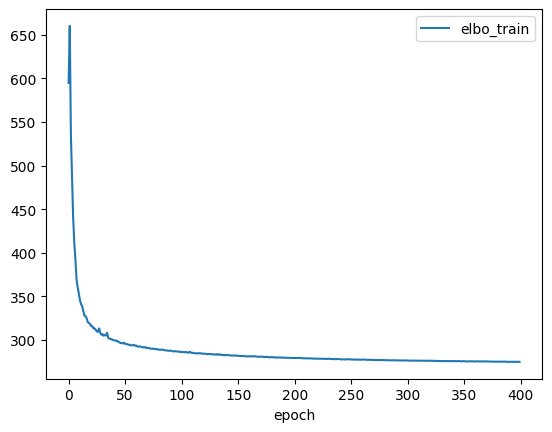

In [44]:
model.history["elbo_train"].plot()